DataFrame created successfully. Shape: (2016, 1)

First few rows of the DataFrame:
                             pm2.5
timestamp                         
2025-03-26 17:20:00+00:00  14.9150
2025-03-26 17:30:00+00:00  14.9980
2025-03-26 17:40:00+00:00  17.7880
2025-03-26 17:50:00+00:00  19.4895
2025-03-26 18:00:00+00:00  16.8065
2025-03-26 18:10:00+00:00  19.4420
2025-03-26 18:20:00+00:00  18.4130
2025-03-26 18:30:00+00:00  17.8495
2025-03-26 18:40:00+00:00  18.2215
2025-03-26 18:50:00+00:00  19.7730
2025-03-26 19:00:00+00:00  19.4230
2025-03-26 19:10:00+00:00  25.2980
2025-03-26 19:20:00+00:00  25.8700
2025-03-26 19:30:00+00:00  26.7085
2025-03-26 19:40:00+00:00  27.1095
2025-03-26 19:50:00+00:00  27.1245
2025-03-26 20:00:00+00:00  29.4780
2025-03-26 20:10:00+00:00  30.0895
2025-03-26 20:20:00+00:00  27.3155
2025-03-26 20:30:00+00:00  27.4665

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2016 entries, 2025-03-26 17:20:00+00:00 to 2025-04-09 17:10:00+00:00
Data col

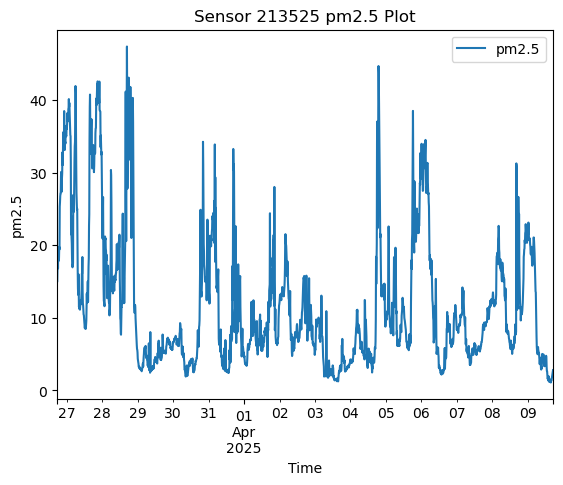

In [3]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime, timedelta

# Replace with your valid API key and sensor index
API_KEY = ""
SENSOR_INDEX = "213525"

# Define timestamps
end_timestamp = datetime.now().strftime("%Y-%m-%dT%H:%M:%SZ")
start_timestamp = (datetime.now() - timedelta(weeks=2)).strftime("%Y-%m-%dT%H:%M:%SZ")

# Specific Date & Time
#start_date = datetime(2025, 3, 1, 0, 0, 0)  #Y, M, D, H, m, S
#end_date = datetime(2025, 3, 7, 0, 0, 0)  
#start_timestamp = start_date.strftime("%Y-%m-%dT%H:%M:%SZ")
#end_timestamp = end_date.strftime("%Y-%m-%dT%H:%M:%SZ")

# API request parameters
url = f"https://api.purpleair.com/v1/sensors/{SENSOR_INDEX}/history"
headers = {"X-API-Key": API_KEY}
params = {
    "start_timestamp": start_timestamp,
    "end_timestamp": end_timestamp,
    "average": 10,
    "fields": "pm2.5_atm"
}
# Initialize df as None
df_PurpleAir = None

# Fetch data from PurpleAir API
try:
    response = requests.get(url, headers=headers, params=params)
    response.raise_for_status()  # Raise exception for HTTP errors
    data = response.json()

    # Extract PM2.5 values and timestamps
    if "data" in data:
        '''pm25_values = [entry[1] for entry in data["data"]]  # PM2.5 value
        timestamps = [entry[0] for entry in data["data"]]  # Timestamp'''
        timestamps = [entry[0] for entry in data["data"]]
        pm25_values = [entry[1] for entry in data["data"]] 

        # Convert timestamps to datetime objects
        '''timestamps = [datetime.fromtimestamp(ts) for ts in timestamps]
'''
        # Create a DataFrame
        #df = pd.DataFrame({"timestamp": timestamps, "pm2.5": pm25_values})
        df_PurpleAir = pd.DataFrame({"timestamp": pd.to_datetime(timestamps), "pm2.5": pm25_values})
        df_PurpleAirSorted = df_PurpleAir.sort_values('timestamp')
        df_PurpleAirSorted.set_index("timestamp", inplace=True)
        print("DataFrame created successfully. Shape:", df_PurpleAirSorted.shape)
        print("\nFirst few rows of the DataFrame:")
        print(df_PurpleAirSorted.head(20))

    else:
        print("Error:", data.get("error", "Unknown error"))
except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")

# Now you can work with the DataFrame outside the try-except block
if df_PurpleAir is not None:
    # Example operations:
    
    print("\nDataFrame info:")
    print(df_PurpleAirSorted.info())
    
    print("\nSummary statistics:")
    print(df_PurpleAirSorted.describe())

    df_PurpleAirSorted.plot(title=f'Sensor {SENSOR_INDEX} pm2.5 Plot', xlabel='Time', ylabel='pm2.5')

    # You can perform more operations here
else:
    print("No data was retrieved.")

